In [1]:
from generateTrees import Node, deserialize, generate_random_tree, serialize
import matplotlib.pyplot as plt
import networkx as nx


In [14]:
#serial es un arbol serializado, pruevo convertirlo en arbol y graficarlo
serial = ['#', '#', '13', '#', '#', '66', '91', '#', '#', '#', '26', '88', '98', '#', '#', '64', '#', '#', '89', '66', '#', '3', '18']
semicolon_separated_string = ';'.join(serial)

print(semicolon_separated_string)

#;#;13;#;#;66;91;#;#;#;26;88;98;#;#;64;#;#;89;66;#;3;18


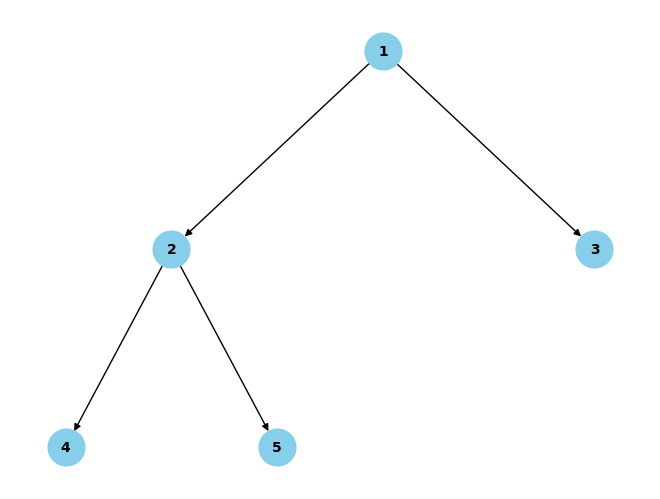

In [9]:
def create_graph(root, graph=None, pos=None, x=0, y=0, layer=1):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {root.id: (x, y)}

    graph.add_node(root.id, data=root.data)
    
    if root.left:
        graph.add_edge(root.id, root.left.id)
        pos[root.left.id] = (x - 2 ** (5 - layer), y - 1)
        create_graph(root.left, graph, pos, x - 2 ** (5 - layer), y - 1, layer + 1)

    if root.right:
        graph.add_edge(root.id, root.right.id)
        pos[root.right.id] = (x + 2 ** (5 - layer), y - 1)
        create_graph(root.right, graph, pos, x + 2 ** (5 - layer), y - 1, layer + 1)

    return graph, pos

# Example usage:
# Assuming you have a tree defined, for instance, the one created in the previous example:

# Creating the tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

# Creating and plotting the graph with both ID and data labels
graph, pos = create_graph(root)
labels = {node: f"{graph.nodes[node]['data']}" for node in graph.nodes}
nx.draw(graph, pos, labels=labels, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.show()

arbol #;#;71;#;#;39;20;#;#;91;#;#;49;17;98;#;#;97;#;#;32;57;#;#;16;#;66;4;75


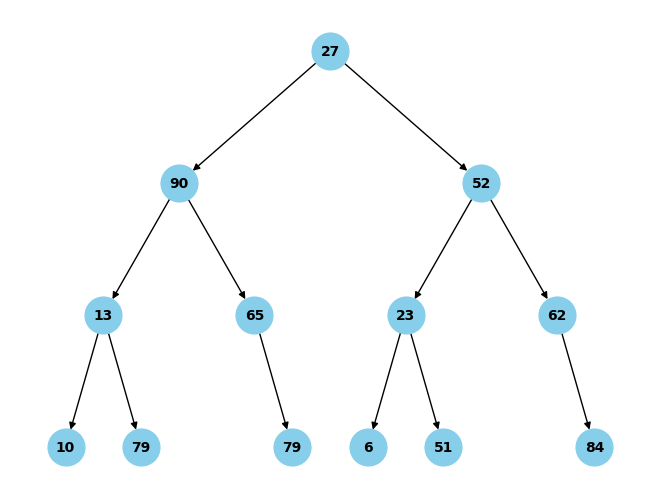

In [11]:
serial = serialize(generate_random_tree(4))
print("arbol", serial)
serial = "#;#;10;#;#;79;13;#;#;#;79;65;90;#;#;6;#;#;51;23;#;#;#;84;62;52;27"
tree = deserialize(serial)
graph, pos = create_graph(tree)

labels = {node: f"{graph.nodes[node]['data']}" for node in graph.nodes}
nx.draw(graph, pos, labels=labels, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.show()

In [28]:
print(tree.data)
print(tree.right.data)#3
print(tree.right.left)#66
print(tree.right.left.right.data)#89
print(tree.right.left.left.data)#64


print(tree.left.data)#98
print(tree.left.right.data)#88
print(tree.left.right.right.data)#26

print(tree.left.left.data)#91
print(tree.left.left.right)#66
print(tree.left.left.left.data)#13

18
3
89
64
98
88
26
91
13
